In [5]:
# from google.colab import drive
# drive.mount("/content/drive")

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [7]:
dataset = pd.read_csv('/content/50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
dataset.describe

<bound method NDFrame.describe of     R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       135495.07        252664.93  California  134307.35
14  119943.24       156547.42        256512.92     Florida  132602.65
15  114523.61       122616.84        261776.23    New York  129917.04
16   78013.11       121597.55        264346.06  California  126992.93
17   94657.16       145077.58        282574.31    New York  125370.37
18   91749.16       114175.79        294919.57     Florida  124266.90
19   86419.70       153514.11             0.00    New York  122776.86
20   76253.86       113867.30        298664.47  California  118474.03
21   78389.47       153773.43        299737.29    New York  111313.02
22   73994.56       122782.75        303319.26     Florida  110352.25
23   67532.53       105751.03        304768.73     Florida  108733.99
24   77044.01        99281.34        140574.81    New York  108552.04
25   64664.71       139553.16        137962.62  California  107404.34
26   75328.87       144135.98        134050.07     Florida  105733.54
27   72107.60       127864.55        353183.81    New York  105008.31
28   66051.52       182645.56        118148.20     Florida  103282.38
29   65605.48       153032.06        107138.38    New York  101004.64
30   61994.48       115641.28         91131.24     Florida   99937.59
31   61136.38       152701.92         88218.23    New York   97483.56
32   63408.86       129219.61         46085.25  California   97427.84
33   55493.95       103057.49        214634.81     Florida   96778.92
34   46426.07       157693.92        210797.67  California   96712.80
35   46014.02        85047.44        205517.64    New York   96479.51
36   28663.76       127056.21        201126.82     Florida   90708.19
37   44069.95        51283.14        197029.42  California   89949.14
38   20229.59        65947.93        185265.10    New York   81229.06
39   38558.51        82982.09        174999.30  California   81005.76
40   28754.33       118546.05        172795.67  California   78239.91
41   27892.92        84710.77        164470.71     Florida   77798.83
42   23640.93        96189.63        148001.11  California   71498.49
43   15505.73       127382.30         35534.17    New York   69758.98
44   22177.74       154806.14         28334.72  California   65200.33
45    1000.23       124153.04          1903.93    New York   64926.08
46    1315.46       115816.21        297114.46     Florida   49490.75
47       0.00       135426.92             0.00  California   42559.73
48     542.05        51743.15             0.00    New York   35673.41
49       0.00       116983.80         45173.06  California   14681.40>

In [29]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [30]:
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
X_train.shape

(40, 6)

In [13]:
multi_regressor = LinearRegression()
multi_regressor.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred = multi_regressor.predict(X_test)

In [15]:
print(multi_regressor.coef_)
print(multi_regressor.intercept_)

[ 8.66383692e+01 -8.72645791e+02  7.86007422e+02  7.73467193e-01
  3.28845975e-02  3.66100259e-02]
42467.52924853278


Making a single prediction (for example the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = 'California')

In [16]:
print(multi_regressor.predict([[1,0,0,160000,130000,300000]]))

[181566.92389386]


In [17]:
print('Variance score: {}'.format(multi_regressor.score(X_test, y_test)))

Variance score: 0.9347068473282546


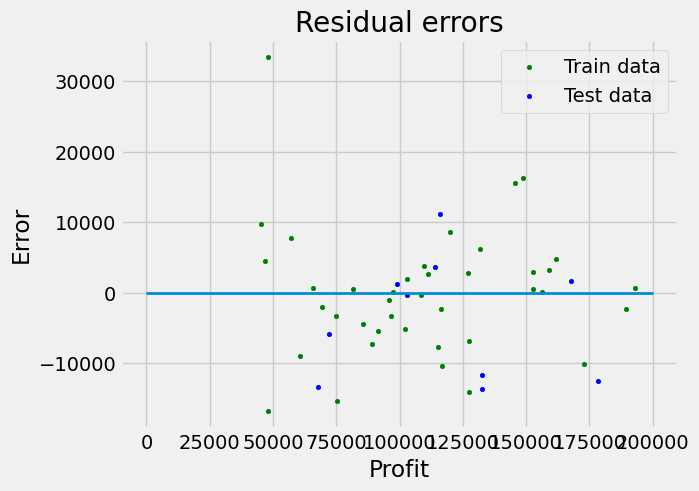

In [18]:
plt.style.use('fivethirtyeight')
plt.scatter(multi_regressor.predict(X_train), multi_regressor.predict(X_train)-y_train, color = "green", s = 10, label = 'Train data')
plt.scatter(multi_regressor.predict(X_test), multi_regressor.predict(X_test)-y_test, color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 200000, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.xlabel("Profit")
plt.ylabel("Error")
plt.show()

In [19]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 7514.29365964318
MSE: 83502864.03256194
RMSE: 9137.9901527941


**POLYNOMIAL REGRESSION**

In [20]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)

In [21]:
poly.fit(X_poly, y_train)
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y_train)

LinearRegression()

In [22]:
y_poly = poly_regressor.predict(poly.fit_transform(X_test))

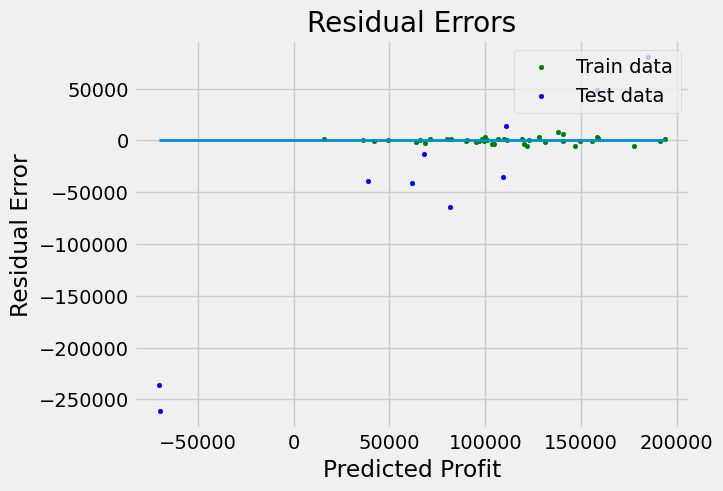

In [26]:
plt.style.use('fivethirtyeight')

# Generate predictions for both train and test sets
y_train_pred = poly_regressor.predict(X_poly)
X_test_poly = poly.transform(X_test)
y_test_pred = poly_regressor.predict(X_test_poly)
test_predictions = poly_regressor.predict(X_test_poly)
# Plot residual errors
plt.scatter(y_train_pred, y_train_pred - y_train, color="green", s=10, label="Train data")
plt.scatter(y_test_pred, y_test_pred - y_test, color="blue", s=10, label="Test data")
plt.hlines(y=0, xmin=min(y_train_pred.min(), y_test_pred.min()), xmax=max(y_train_pred.max(), y_test_pred.max()), linewidth=2)
plt.legend(loc="upper right")
plt.title("Residual Errors")
plt.xlabel("Predicted Profit")
plt.ylabel("Residual Error")
plt.show()


In [27]:
# Evaluate the model
print('MAE:', metrics.mean_absolute_error(y_test, test_predictions))
print('MSE:', metrics.mean_squared_error(y_test, test_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_predictions)))

MAE: 83247.51932360233
MSE: 14182567484.55856
RMSE: 119090.58520537447


In [28]:

print('Coefficients:', poly_regressor.coef_)
print('Intercept:', poly_regressor.intercept_)


Coefficients: [-1.72558041e-04 -6.45055823e-05 -1.02149259e-04 -2.64663629e-05
 -1.64281153e-01 -3.99038661e-01  1.07311906e-01  7.72916994e-06
  2.50631461e-06  7.09387973e-07 -8.80288237e-01 -3.91347433e-01
  4.54642113e-01 -4.04900275e-06 -1.39965250e-09  4.60774195e-01
  8.74003786e-02 -4.20348666e-01 -8.31771030e-07  2.55219588e-01
 -9.50948850e-02  7.30174590e-02 -3.26127450e-05  4.47713708e-05
  3.62492011e-06  1.20037931e-05 -1.46280964e-05  2.38940712e-06
  4.87900353e-06 -4.16333634e-16 -2.77555756e-16 -8.80288237e-01
 -3.91347442e-01  4.54642115e-01 -2.42861287e-17  5.55111512e-17
  1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.71933460e-05
  1.39702614e-05 -8.28096591e-06  7.03597137e-06 -5.94270906e-06
  5.55591227e-07 -4.04701100e-06  0.00000000e+00  4.60774195e-01
  8.74003788e-02 -4.20348666e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.06977745e-05  6.78344146e-06
  1.0361062